In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 15

<IPython.core.display.Javascript object>

In [3]:
data = np.append(
    stats.norm.rvs(size=500, loc=1, scale=0.5),
    stats.norm.rvs(size=500, loc=3, scale=0.5),
)

<IPython.core.display.Javascript object>

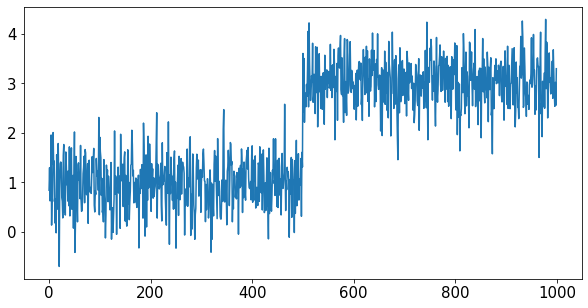

<IPython.core.display.Javascript object>

In [4]:
plt.plot(data)
plt.show()

In [ ]:
data = [1, 2, 3, 4]

T = len(data)

R = np.zeros([T+1, T+1])
prob_data = np.zeros([T+1, T+1])
mu = np.zeros([T+1, T+1])
tau = np.ones([T+1, T+1])
update_vec = np.zeros([T+1, T+1])


TIME =  np.zeros([T+1, T+1])
# TIME[0, 1] = 1

H = 1 / 60

across = {"rows": 0, "columns": 1}


for t in range(1, T+1):
    x = data[t-1]
    
#     prob_data[:, t] = stats.norm.pdf(x=x, loc=mu[:, t], scale=1/tau[:, t])

#     # Update Run Length P
#     R[1:t+1, t+1] = R[0:t, t] * prob_data * H  # element wise multiplication
    
#     R[0, t+1] = np.sum(R[1:t, t] * prob_data  * (1 - H))
    
#     # Normalise to get valid probabilities     
#     R[:, t+1] = R[:, t+1] / R.sum(axis=across["rows"])
#     TIME[1:T+1, t+1] =  TIME[0:T, t]
    TIME[1:t+1, t] =  TIME[0:t, t-1] + x
    
    print(TIME[:, t])
    






    
#     mu[1:t, t+1], = mu[1:t, t+1] 
    
    


In [ ]:
# I want to look at R


A = np.array([[1, 2, 3], [2, 5, 99]])
print(A)

A / A.sum(axis=across["rows"])


In [ ]:
?stats.norm.pdf

In [ ]:
x = 0.5


In [170]:
data = np.array([1, 2, 4, 6])



<IPython.core.display.Javascript object>

In [171]:
def update_param_vtau(data: np.array) -> None:

    mu0 = 3
    n0 = 1
    alpha = 10
    beta = 1

    tau_mean_prior = alpha / beta

    print(f"Prior mean, mu0 {mu0}", f"Prior precision, tau0 {tau_mean_prior: .2f}")

    n = len(data)
    data_bar = np.mean(data)
    tau_x = 1 / np.var(data)

    print("")
    print(f"Sample mean, x_bar {data_bar}", f"Sample precision, tau_x {tau_x: .2f}")

    alpha_post = alpha + n / 2
    beta_post = (
        beta
        + 0.5 * np.sum((data - data_bar) ** 2)
        + 0.5 * n * n0 / (n + n0) * (data_bar - mu0) ** 2
    )
    tau_mean_post = alpha_post / beta_post

    mu_mean_post = (n / (n + n0)) * data_bar + (n0 / (n + n0)) * mu0

    print("---")
    print(
        f"Posterior mean, {mu_mean_post: .2f}",
        f"Posterior precision, {tau_mean_post: .2f}",
    )

    pass


update_param_vtau(data)

Prior mean, mu0 3 Prior precision, tau0  10.00

Sample mean, x_bar 3.25 Sample precision, tau_x  0.27
---
Posterior mean,  3.20 Posterior precision,  1.43


<IPython.core.display.Javascript object>

In [172]:
def update_param_reparam(data: np.array) -> None:

    mu0 = 3
    kappa0 = 1
    alpha = 10
    beta = 1

    tau_mean_prior = alpha / beta

    print(f"Prior mean, mu0 {mu0}", f"Prior precision, tau0 {tau_mean_prior: .2f}")

    n = len(data)
    data_bar = np.mean(data)
    tau_x = 1 / np.var(data)

    print("")
    print(f"Sample mean, x_bar {data_bar}", f"Sample precision, tau_x {tau_x: .2f}")

    alpha_post = alpha + n / 2
    beta_post = (
        beta
        + 0.5 * np.sum((data - data_bar) ** 2)
        + 0.5 * (n * kappa0 / (n + kappa0)) * (data_bar - mu0) ** 2
    )
    tau_mean_post = alpha_post / beta_post

    kappa_post = kappa0 + n
    mu_mean_post = (n / (n + kappa0)) * data_bar + (kappa0 / (n + kappa0)) * mu0

    print("---")
    print(
        f"Posterior mean, {mu_mean_post: .2f}",
        f"Posterior precision, {tau_mean_post: .2f}",
    )

    pass


update_param_reparam(data)

Prior mean, mu0 3 Prior precision, tau0  10.00

Sample mean, x_bar 3.25 Sample precision, tau_x  0.27
---
Posterior mean,  3.20 Posterior precision,  1.43


<IPython.core.display.Javascript object>

In [ ]:
t0 = 1


online_mu = np.zeros(n + 1)
online_alpha = np.zeros(n + 1)
online_beta = np.zeros(n + 1)
online_tau = np.zeros(n + 1)


online_s = np.zeros(n + 1)
online_t = np.zeros(n + 1)


online_mu[0] = 3
online_alpha[0] = 10
online_beta[0] = 1
sample_mean = 0
for t in range(n):

    x = data[t]
    # Keeping track of time
    T = t0 + t + 1
    online_mu[t + 1] = (1 /T) * (x + (T - 1) * online_mu[t])

    sample_mean = (1 / (t + 1)) * (x + (t + 1 - 1) * sample_mean)
    print(x, sample_mean)

    online_alpha[t + 1] = online_alpha[t] + 0.5

    online_s[t + 1] = online_s[t] + x ** 2

    online_beta[t + 1] = (
        online_beta[0]
        + 0.5 * (online_s[t + 1] - (t + 1) * (sample_mean ** 2))
        + 0.5 * ((t + 1) * t0 / (t + 1 + t0)) * ((sample_mean - mu0) ** 2)
    )

    online_tau[t + 1] = online_alpha[t + 1] / online_beta[t + 1]

In [33]:
print(np.sum(data))

sample_mean = np.zeros([n + 1, n + 1])
sample_sum = np.zeros([n + 1, n + 1])
counter = np.zeros([n + 1, n + 1])


time = 0
time_list = []
sample_mean[0, :] = 0


for t in range(1, n + 1):
    x_t = data[t - 1]

    counter[1 : t + 1, t] = counter[:t, t - 1] + 1

    sample_mean[1 : t + 1, t] = (1 / counter[1 : t + 1, t]) * (
        x_t + (counter[1 : t + 1, t] - 1) * sample_mean[:t, t - 1]
    )

#     sample_sum[1 : t + 1, t] = sample_sum[:t, t - 1] + x_t

print(data)
print(counter)

13
[1 2 4 6]
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 2. 2. 2.]
 [0. 0. 0. 3. 3.]
 [0. 0. 0. 0. 4.]]


<IPython.core.display.Javascript object>

In [145]:
data

array([  1,   2,   4, -60])

<IPython.core.display.Javascript object>


\begin{align*}
\kappa_t = {} & \kappa_{t-1} + 1 \\
\mu_t = {} & \frac{1}{\kappa_t}  \left(  x_t + \kappa_{t-1} \mu_{t-1}  \right) \\
\alpha_t = {} & \alpha_{t-1} + 1/2  \\
\beta_t = {} & \beta_{t-1} + \frac{\kappa_t (x_t - \mu_t)^2 }{2 (\kappa_t + 1)} \\
    p(x) = {} & \textsf{Student-T}_{2\alpha_t} \left(\mu=\mu_t, \lambda= \frac{\alpha_t \kappa_t}{\beta_t(\kappa_t + 1)}   \right)
\end{align*}

In [209]:
n = len(data)

mu = np.zeros([n + 1, n + 1])
kappa = np.zeros([n + 1, n + 1])
alpha = np.zeros([n + 1, n + 1])
beta = np.zeros([n + 1, n + 1])
tau = np.zeros([n + 1, n + 1])
deg_f = np.zeros([n + 1, n + 1])
pis = np.zeros([n + 1, n + 1])
R = np.zeros([n + 1, n + 1])


mu0 = 3
kappa0 = 1
alpha0 = 10
beta0 = 1


mu[0, :] = mu0
kappa[0, :] = kappa0
alpha[0, :] = alpha0
beta[0, :] = beta0
tau[0, :] = alpha[0, :] / beta[0, :]
deg_f[0, :] = 2 * alpha0
R[0, 0] = 1
H = 1 / 20

time = 0
time_list = []


for t in range(1, n + 1):
    x_t = data[t - 1]

    pis[:t, t] = stats.t.pdf(
        x=x_t,
        df=deg_f[:t, t - 1],
        loc=mu[:t, t - 1],
        scale=np.sqrt(
            beta[:t, t - 1]
            * (kappa[:t, t - 1] + 1)
            / (alpha[:t, t - 1] * kappa[:t, t - 1])
        ),
    )

    R[1 : t + 1, t] = R[:t, t - 1] * pis[:t, t] * (1 - H)
    R[0, t] = np.sum(R[:t, t - 1] * pis[:t, t] * H)
    R[:, t] = R[:, t] / np.sum(R[:, t])

    # Update Params
    kappa[1 : t + 1, t] = 1 + kappa[:t, t - 1]

    mu[1 : t + 1, t] = (1 / kappa[1 : t + 1, t]) * (
        x_t + kappa[0:t, t - 1] * mu[:t, t - 1]
    )

    alpha[1 : t + 1, t] = 0.5 + alpha[:t, t - 1]

    beta[1 : t + 1, t] = (
        beta[:t, t - 1]
        + 0.5 * kappa[:t, t - 1] / (kappa[:t, t - 1] + 1) * (x_t - mu[:t, t - 1]) ** 2
    )

    tau[:, t] = alpha[:, t] / beta[:, t]

    deg_f[:, t] = 2 * alpha[:, t]


display(pd.DataFrame(R))

/opt/anaconda3/envs/homework/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


,0,1,2,3,4
0,1.0,0.05,0.050000,0.050000,0.050000
1,0.0,0.95,0.005702,0.734226,0.009782
2,0.0,0.00,0.944298,0.005248,0.743525
3,0.0,0.00,0.000000,0.210526,0.002555
4,0.0,0.00,0.000000,0.000000,0.194137


<IPython.core.display.Javascript object>

In [203]:
from functools import partial


def online_changepoint_detection(data, hazard_func, observation_likelihood):
    maxes = np.zeros(len(data) + 1)

    R = np.zeros((len(data) + 1, len(data) + 1))
    R[0, 0] = 1

    for t, x in enumerate(data):
        # Evaluate the predictive distribution for the new datum under each of
        # the parameters.  This is the standard thing from Bayesian inference.
        predprobs = observation_likelihood.pdf(x)
        print(predprobs)

        # Evaluate the hazard function for this interval
        H = hazard_func(np.array(range(t + 1)))

        # Evaluate the growth probabilities - shift the probabilities down and to
        # the right, scaled by the hazard function and the predictive
        # probabilities.
        R[1 : t + 2, t + 1] = R[0 : t + 1, t] * predprobs * (1 - H)

        # Evaluate the probability that there *was* a changepoint and we're
        # accumulating the mass back down at r = 0.
        R[0, t + 1] = np.sum(R[0 : t + 1, t] * predprobs * H)

        # Renormalize the run length probabilities for improved numerical
        # stability.
        R[:, t + 1] = R[:, t + 1] / np.sum(R[:, t + 1])

        # Update the parameter sets for each possible run length.
        observation_likelihood.update_theta(x)

        maxes[t] = R[:, t].argmax()
    return R, maxes


def constant_hazard(lam, r):
    return 1 / lam * np.ones(r.shape)


class StudentT:
    def __init__(self, alpha, beta, kappa, mu):
        self.alpha0 = self.alpha = np.array([alpha])
        self.beta0 = self.beta = np.array([beta])
        self.kappa0 = self.kappa = np.array([kappa])
        self.mu0 = self.mu = np.array([mu])

    def pdf(self, data):
        return stats.t.pdf(
            x=data,
            df=2 * self.alpha,
            loc=self.mu,
            scale=np.sqrt(self.beta * (self.kappa + 1) / (self.alpha * self.kappa)),
        )

    def update_theta(self, data):
        muT0 = np.concatenate(
            (self.mu0, (self.kappa * self.mu + data) / (self.kappa + 1))
        )
        kappaT0 = np.concatenate((self.kappa0, self.kappa + 1.0))
        alphaT0 = np.concatenate((self.alpha0, self.alpha + 0.5))
        betaT0 = np.concatenate(
            (
                self.beta0,
                self.beta
                + (self.kappa * (data - self.mu) ** 2) / (2.0 * (self.kappa + 1.0)),
            )
        )

        self.mu = muT0
        self.kappa = kappaT0
        self.alpha = alphaT0
        self.beta = betaT0

<IPython.core.display.Javascript object>

In [212]:
H_f = partial(constant_hazard, 1 / H)
obs_likelihood = StudentT(alpha=alpha0, beta=beta0, kappa=kappa0, mu=mu0)

R_hat, max_hat = online_changepoint_detection(
    data=data, hazard_func=H_f, observation_likelihood=obs_likelihood
)

[0.00060835]
[0.0846084 0.7375235]
[0.0846084  0.00530293 0.00128455]
[3.71700677e-06 1.92388807e-05 9.25083925e-06 1.75192677e-05]


<IPython.core.display.Javascript object>

In [211]:
pd.DataFrame(R_hat)

,0,1,2,3,4
0,1.0,0.5,0.500000,0.500000,0.500000
1,0.0,0.5,0.051457,0.490162,0.081265
2,0.0,0.0,0.448543,0.003162,0.412342
3,0.0,0.0,0.000000,0.006676,0.001279
4,0.0,0.0,0.000000,0.000000,0.005114


<IPython.core.display.Javascript object>

In [208]:
pd.DataFrame(pis)

,0,1,2,3,4
0,0.0,0.000608,0.084608,0.084608,0.000004
1,0.0,0.000000,0.737524,0.005303,0.000019
2,0.0,0.000000,0.000000,0.001285,0.000009
3,0.0,0.000000,0.000000,0.000000,0.000018
4,0.0,0.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>